# 0.) Import and Clean data

In [106]:
import pandas as pd
# from colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [108]:
#drive.mount('/content/gdrive/', force_remount = True)

In [109]:
df = pd.read_csv('bank-additional-full (1).csv', sep = ';')

In [110]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [111]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [112]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [113]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

In [114]:
X_train.head()

,age,duration,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
39075,29,77,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34855,29,12,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7107,45,277,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
31614,34,70,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34878,32,1181,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


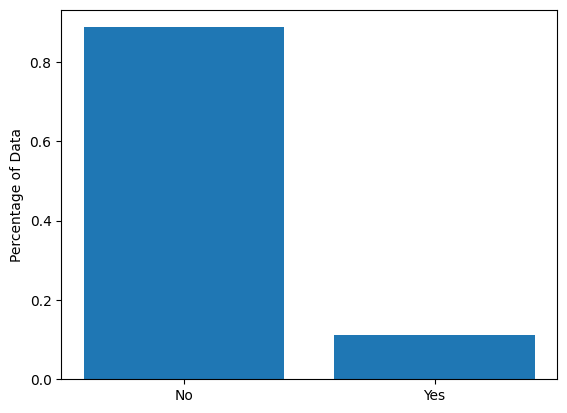

In [115]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [116]:
a = np.arange(2, 80)
a

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

In [117]:
x_scaled

,age,duration,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,29,77,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,29,12,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,45,277,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,34,70,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,32,1181,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51155,38,748,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51156,38,654,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51157,25,1042,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51158,24,450,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


# 1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [138]:
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Update the range of categorical_features
smote = SMOTENC(categorical_features = np.arange(2, 82))
#smote = SMOTE()
x_scaled, y_scaled = smote.fit_resample(X_train, y_train)

#scaler = StandardScaler().fit(X_train)

#X_scaled = scaler.transform(X_train)
#X_test = scaler.transform(X_test)


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [152]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(x_scaled, y_scaled)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= 200.5\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= 109.5\ngini = 0.313\nsamples = 19131\nvalue = [15423, 3708]\nclass = No'),
 Text(0.125, 0.375, 'duration <= 80.5\ngini = 0.102\nsamples = 8358\nvalue = [7906, 452]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.022\nsamples = 4992\nvalue = [4937, 55]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.208\nsamples = 3366\nvalue = [2969, 397]\nclass = No'),
 Text(0.375, 0.375, 'contact_telephone <= 0.5\ngini = 0.422\nsamples = 10773\nvalue = [7517, 3256]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 7831\nvalue = [4704, 3127]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.084\nsamples = 2942\nvalue = [2813, 129]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 0.5\ngini = 0.433\nsamples = 32029\nvalue = [10157, 21872]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 474.5\ngini = 0.362\nsamples = 25477\nvalue = [6043, 19434]\nclass = Yes')

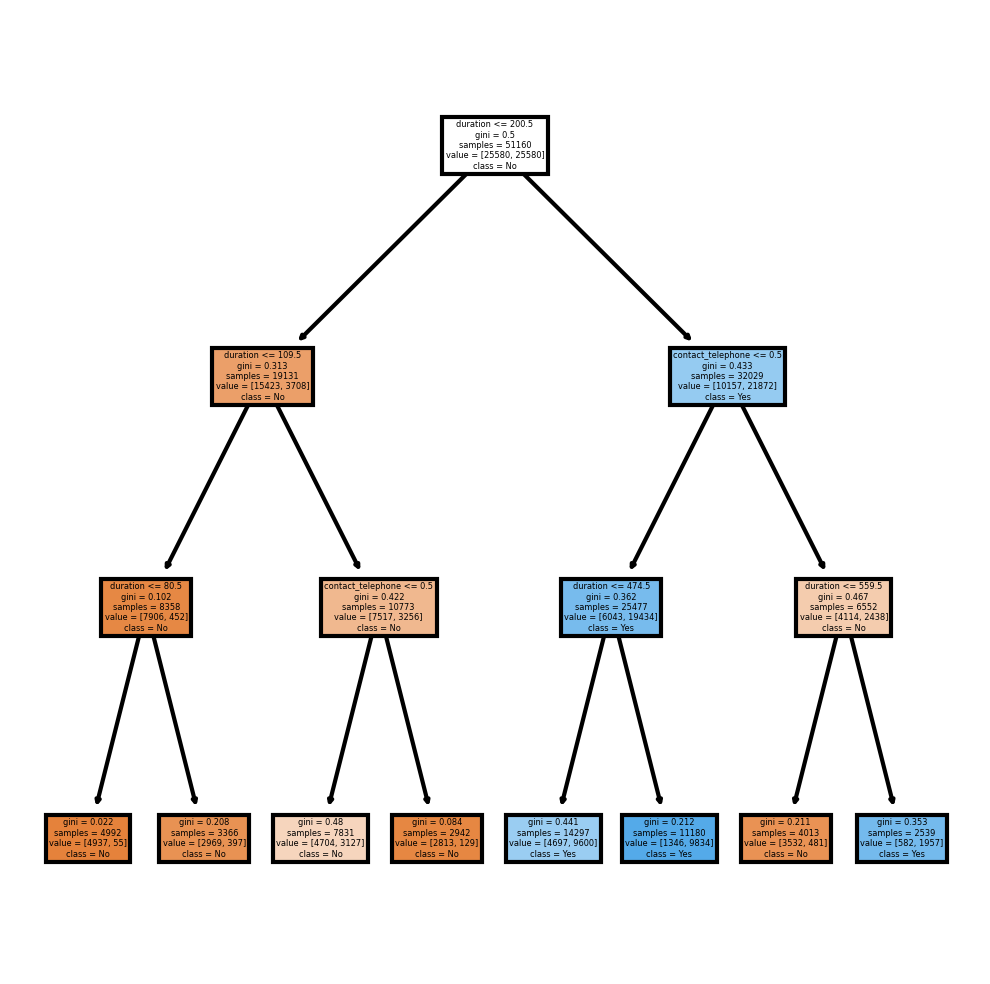

In [153]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [154]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

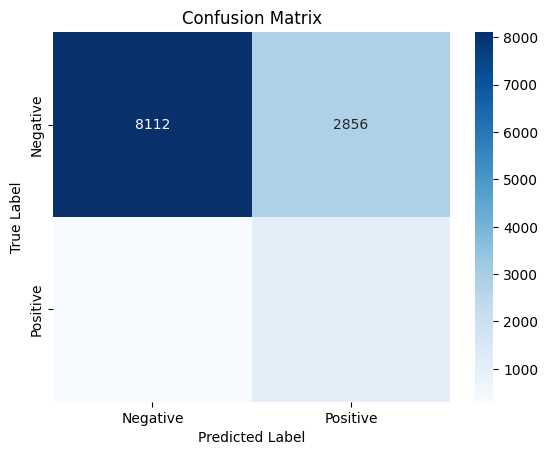

In [155]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [156]:
# optimize on max depth...
dtree_main = DecisionTreeClassifier(max_depth = 3)

In [157]:
bagging = BaggingClassifier(base_estimator=dtree_main, 
                  n_estimators=100, 
                  max_samples=.5,
                  max_features=1.)

bagging.fit(x_scaled, y_scaled)
y_pred = bagging.predict(X_test)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [158]:
x_scaled

,age,duration,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,29,77,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,29,12,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,45,277,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,34,70,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,32,1181,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51155,38,1159,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
51156,28,153,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
51157,37,336,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
51158,59,159,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [159]:
y_scaled

,yes
0,False
1,False
2,False
3,False
4,False
...,...
51155,True
51156,True
51157,True
51158,True


# 4.) Boost your tree

In [160]:
from sklearn.ensemble import AdaBoostClassifier

In [161]:
dtree_main = DecisionTreeClassifier(max_depth = 3)



# 5). Train a logistic regression on decision tredd, boosted tree, bagged tree

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


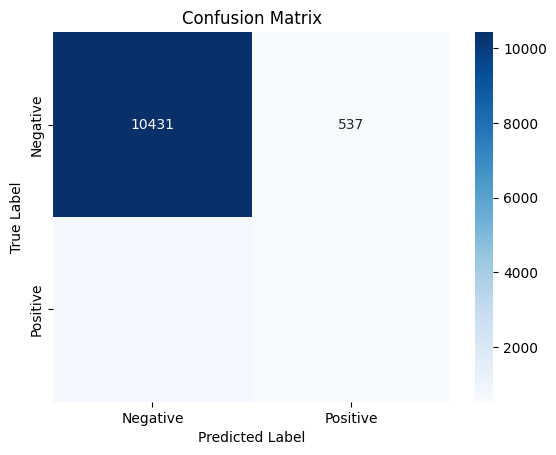

In [ ]:
y_true = y_test
cm_raw = confusion_matrix(y_true,y_pred)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [130]:
pip install mlens

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# from mlens.ensemble import SuperLearner

In [132]:
X_base_learners = [list[bagging.predict(X_train)], list(boost.predict(X_train)), list(dtree_main.predict(X_train))]

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packag

In [133]:
super_learner = LogisticRegression()

In [134]:
# Assuming bagging, boost, and dtree_main are your base models
predictions = [bagging.predict(X_train), boost.predict(X_train), dtree_main.predict(X_train)]

# Stack predictions horizontally to create a feature matrix for the super learner
# Each model's predictions become a column in the matrix
X_base_learners = np.column_stack(predictions)

# Now fit the super learner
super_learner = LogisticRegression()
super_learner.fit(X_base_learners, y_train)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packag

LogisticRegression()

In [ ]:
super_learner.coef_

array([[1.30680608, 4.9456112 , 0.20863634]])

# 6.)

The boost model stands out as the best, as it accurately categorizes the highest number of labels. Specifically, the boost model exhibits the highest coefficient. This indicates that the boost model significantly enhances the meta model's ability to make accurate predictions.